In [1]:
import pickle
import mgf_math
import geneMGF
import sympy
sympy.init_printing()

A useful quantitiy for understanding how genetic architecture impacts the trait distribution is the coefficient of variation of the variance. This is defined as 
$$
\frac{\sqrt{Var[V_g]}}{E[V_g]}.
$$
Since we already have an expression for the expected variance in the population, what we need to derive is the variance of the variance.
$$
  Var[V_g] =  Var\left[ \frac{1}{N}\sum \left( Y_i - \frac{\sum Y_j}{N} \right)^2\right] \\
  = \frac{1}{N^2}\left( \sum Var[(Y_i - \frac{\sum Y_j}{N})^2] + \sum_{i \neq j} 
              Cov[(Y_i - \frac{\sum Y_k}{N})^2, (Y_j - \frac{\sum Y_k}{N})^2]\right)
$$

The first term can be ignored if the population size is large. The second term is determined by
the covariance in the squared deviations from the mean. The covariance can be calculated by
considering its individual parts.

\begin{align*}
  &Cov[Y_i^2, Y_j^2] \approx -2Cov[Y_i^2,Y_j^2] \nonumber \\
  &Cov[Y_i^2, -2Y_j \frac{\sum Y_k}{N}] \approx -2Cov[Y_i^2,Y_jY_k] \nonumber \\
  &Cov[Y_i^2, \left(\frac{\sum Y_k}{N}\right)^2] \approx Cov[Y_i^2,Y_jY_k] \nonumber \\
  &Cov[-2Y_i\left(\frac{\sum Y_k}{N}\right), Y_j^2] \approx -2Cov[Y_i^2,Y_jY_k] \nonumber \\
  &Cov[-2Y_i\left(\frac{\sum Y_k}{N}\right),-2Y_j\left(\frac{\sum Y_k}{N}\right)] 
  \approx 4Cov[Y_iY_j,Y_kY_l] \nonumber \\
  &Cov[-2Y_i\left(\frac{\sum Y_k}{N}\right), \left(\frac{\sum Y_k}{N}\right)] 
  \approx -2Cov[Y_iY_j,Y_kY_l] \nonumber \\
  &Cov[\left(\frac{\sum Y_k}{N}\right)^2, Y_j^2] 
  \approx Cov[Y_j^2,Y_iY_k] \nonumber \\
  &Cov[\left(\frac{\sum Y_k}{N}\right)^2,-2Y_j\left(\frac{\sum Y_k}{N}\right)] 
  \approx -2Cov[Y_iY_j,Y_kY_l] \nonumber \\
  &Cov[\left(\frac{\sum Y_k}{N}\right)^2,\left(\frac{\sum Y_k}{N}\right)^2] 
  \approx Cov[Y_iY_j,Y_kY_l] \nonumber
\end{align*}

Combining all these gives 
\begin{equation}
  Cov[(Y_i - \frac{\sum Y_k}{N})^2, (Y_j - \frac{\sum Y_k}{N})^2] = 
  E[Y_i^2Y_j^2] - E[Y_i^2]^2 - 2E[Y_i^2Y_jY_k] + 2E[Y_i^2]E[Y_jY_k] +
  E[Y_iY_jY_kY_l] - E[Y_iY_j]^2.
\end{equation}

What we need to do next is derive expressions for each part of this covariance. First we'll calculate the second order moments: $E[Y_i^2]$ and $E[Y_iE_j]$.

In [3]:
with open("test_mgf_4.pyc", "rb") as fin:
    mgf_4 = pickle.load(fin)

In [4]:
mom_x1x1_4 = mgf_4.calc_moment([2, 0, 0, 0], approx_type="exchangeable")
mom_x1x2_4 = mgf_4.calc_moment([1, 1, 0, 0], approx_type="exchangeable")

In [5]:
mom_x1x1_4

In [6]:
mom_x1x2_4

The fourth order moments were computed previously and are already available. 

In [8]:
mom_x1x2x3x4_4 = mgf_4.calc_moment([1, 1, 1, 1], approx_type = "exchangeable")
mom_x1x1x2x3_4 = mgf_4.calc_moment([2, 1, 1, 0], approx_type = "exchangeable")
mom_x1x1x2x2_4 = mgf_4.calc_moment([2, 2, 0 ,0], approx_type = "exchangeable")

Now let's combine these to get an expression for the covariance.

In [9]:
sqd_cov = mom_x1x1x2x2_4 - mom_x1x1_4**2 - 2*mom_x1x1x2x3_4 + 2*mom_x1x1_4*mom_x1x2_4 + mom_x1x2x3x4_4 - mom_x1x2_4**2

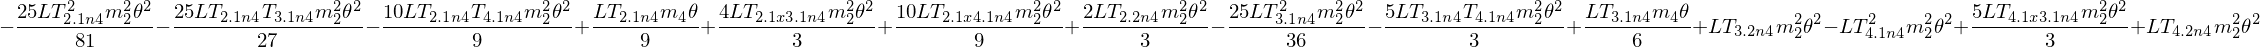

In [10]:
mgf_math.sub_all_ti(sqd_cov, [['0'], ['1'], ['2'], ['3']]).simplify().expand()

This expression can be rewritten using the identity $E[T_{2,2}] = \frac{5}{9}E[T_{2,4}] + \frac{5}{6}E[T_{3,4}] + E[T_{4,4}]$ to give:
$$
L m_2^2 \theta^2 Var[T_{2,2}] + 
L m_2^2 \theta^2\left(\frac{29}{81} E[T_{2,4}^2] + \frac{11}{27} E[T_{2,4}T_{3,4}] + \frac{11}{36} E[T_{3,4}^2]\right) +
    L m_4 \theta \left( \frac{1}{9} E[T_{2,4}] + \frac{1}{6} E[T_{3,4}]\right)
$$

The coefficient of variation of the variance is the standard deviation of the variance divided by the expected variance. Since the expected variance is $L m_2\theta E[T_{2,2}]$, the coefficient of variation is 
$$
CVV = \frac{\sqrt{L m_2^2 \theta^2 Var[T_{2,2}] + 
L m_2^2 \theta^2\left(\frac{29}{81} E[T_{2,4}^2] + \frac{11}{27} E[T_{2,4}T_{3,4}] + \frac{11}{36} E[T_{3,4}^2]\right) +
    L m_4 \theta \left( \frac{1}{9} E[T_{2,4}] + \frac{1}{6} E[T_{3,4}]\right)}}{L m_2\theta E[T_{2,2}]}
$$

This can be rearranged to give 

$$
\sqrt{\frac{Var[T_{2,2}] + \frac{29}{81} E[T_{2,4}^2] + \frac{11}{27} E[T_{2,4}T_{3,4}] + \frac{11}{36} E[T_{3,4}^2]}{L E[T_{2,2}]^2} +
\frac{\kappa}{L\theta E[T_{2,2}]}\left( \frac{\frac{1}{9} E[T_{2,4}] + \frac{1}{6} E[T_{3,4}]}{E[T_{2,2}]} \right)}
$$

What we have here is a first term proportional to $1/L$ times the constant

$$
A = \frac{Var[T_{2,2}] + \frac{29}{81} E[T_{2,4}^2] + \frac{11}{27} E[T_{2,4}T_{3,4}] + \frac{11}{36} E[T_{3,4}^2]}{ E[T_{2,2}]^2}
$$
that depends on the genealogical distribution. The second term is proportional to $\kappa/L\theta E[T_{2,2}]$ times a different genealogical constant 

$$
B = \frac{\frac{1}{9} E[T_{2,4}] + \frac{1}{6} E[T_{3,4}]}{E[T_{2,2}]}
$$

When the expected number of mutations separating two haplotypes is large but these all happen at one locus the resulting CVV is simply $\sqrt{A}$. When the number of loci becomes large but the expected number of mutations separating two ploids is still low, the CVV is 

$$
\sqrt{\frac{\kappa B}{L\theta E[T_{2,2}]}}
$$

Now let's do this for the case of a constant-size panmicitic population to see how, for a fixed triat sparsity how changing the number of loci affects the CVV.

In [4]:
const_gene_mgf = geneMGF.geneMGF([[0], [1], [2], [3]])
mgf_4.make_mgf(order = 4, approx_type = 'full', gene_mgf = const_gene_mgf)

In [11]:
constm_x1x1_4 = mgf_4.calc_moment([2, 0, 0, 0], approx_type="full", gene_mgf=const_gene_mgf)
constm_x1x2_4 = mgf_4.calc_moment([1, 1, 0, 0], approx_type="full", gene_mgf=const_gene_mgf)

making mgf approx...
taking derivative k_0 order 1
taking derivative k_0 order 2
making mgf approx...
mgf already created!
taking derivative k_0 order 1
taking derivative k_1 order 1


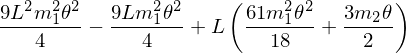

In [12]:
constm_x1x1_4

In [13]:
constm_x1x2x3x4_4 = mgf_4.calc_moment([1, 1, 1, 1], approx_type = "full")
constm_x1x1x2x3_4 = mgf_4.calc_moment([2, 1, 1, 0], approx_type = "full")
constm_x1x1x2x2_4 = mgf_4.calc_moment([2, 2, 0 ,0], approx_type = "full")

making mgf approx...
mgf already created!
taking derivative k_0 order 1
taking derivative k_1 order 1
taking derivative k_2 order 1
taking derivative k_3 order 1
making mgf approx...
mgf already created!
taking derivative k_0 order 1
taking derivative k_0 order 2
taking derivative k_1 order 1
taking derivative k_2 order 1
making mgf approx...
mgf already created!
taking derivative k_0 order 1
taking derivative k_0 order 2
taking derivative k_1 order 1
taking derivative k_1 order 2


In [14]:
cosnt_sqd_cov = constm_x1x1x2x2_4 - constm_x1x1_4**2 - 2*constm_x1x1x2x3_4 + 2*constm_x1x1_4*constm_x1x2_4 + constm_x1x2x3x4_4 - constm_x1x2_4**2

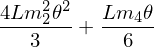

In [15]:
cosnt_sqd_cov.simplify().expand()

In [16]:
(constm_x1x1_4 - constm_x1x2_4).simplify().expand()

This implies that the CVV is 

$$
\sqrt{\frac{4}{3}\frac{1}{L} + \frac{1}{6}\frac{\kappa}{L\theta}}
$$

and we therefore have $A=4/3$ and $B=1/6$. The mutation rate here is per unit of coalescent time. 

To investigate this in models other than a constant-sized population we have to calculate the necessary branch moments under those models.